In [ ]:
%matplotlib notebook

import cv2
import glob

import numpy as np
import matplotlib.pyplot as plt

import time


In [2]:
def undistort(im):
    return im


def detectFeatures(im):
    kpts = cv2.goodFeaturesToTrack(im,  maxCorners = 100,
                                       qualityLevel = 0.1,
                                       minDistance = 4,
                                       blockSize = 7)
    return kpts

def trackFeatures(im1, im2, prevPts):
    
    newPts, status, err = cv2.calcOpticalFlowPyrLK(im1, im2, prevPts, None, winSize=(21, 21), maxLevel=3, minEigThreshold=0.001)
    
    #newSet = []
    #prevSet = []
    #for i in xrange(len(status)):
    #    pt = newPts[i]
    ##    if status[i] == 0 or pt[0][0] < 0 or pt[0][1] < 0:
    ##        if pt[0][0] < 0 or pt[0][1] < 0:
    #            status[i] = 0
    #    else:
    #        newSet.append([[pt[0][0], pt[0][1]]])
    #        prevSet.append([[prevPts[i][0][0], prevPts[i][0][1]]])
    
    #newPts = np.array(newSet)
    #prevPts = np.array(prevSet)
    
    return newPts, prevPts
    

In [ ]:
im1 = cv2.imread('../tests/ims/02.jpg')
im2 = cv2.imread('../tests/ims/03.jpg')


print time.clock()
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

test = detectFeatures(im1)

print len(test[0][0])

newPts, prevPts = trackFeatures(im1, im2, test)


print "test", test
print "\n\nnewpts", newPts

E, mask = cv2.findEssentialMat(prevPts, newPts, 657.30254, (360, 240.), cv2.RANSAC, .999, 1.0)

K = np.matrix([[657.30254, 0, 360.71656],
               [0        , 657.30254, 240],
               [0, 0, 1]])

pose, R, t, mask = cv2.recoverPose(E, prevPts, newPts, focal=657.30254, pp=(360, 240))

print pose, R, t, mask, time.clock()


todraw = im1.copy()
todraw2 = im2.copy()

for i in test:
    cv2.circle(todraw, tuple(i[0]), 3, (0, 0, 255), 3)
    
for i in newPts:
    cv2.circle(todraw2, tuple(i[0]), 3, (0, 0, 255), 3)
    
newim = np.hstack([todraw, todraw2])

plt.imshow(newim, cmap='gray')


<IPython.core.display.Javascript object>


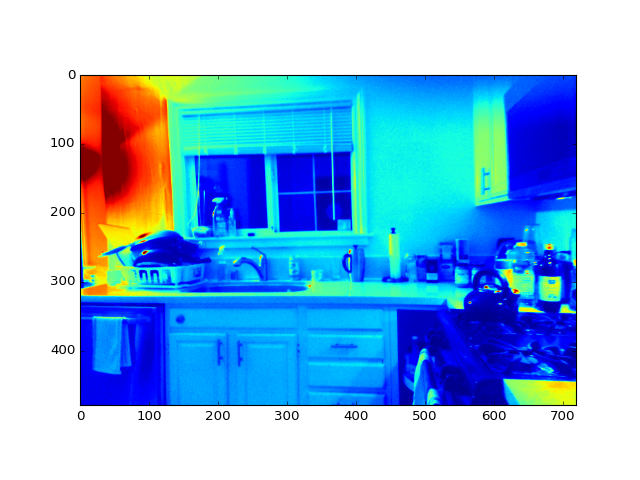

0.9943060875


<IPython.core.display.Javascript object>


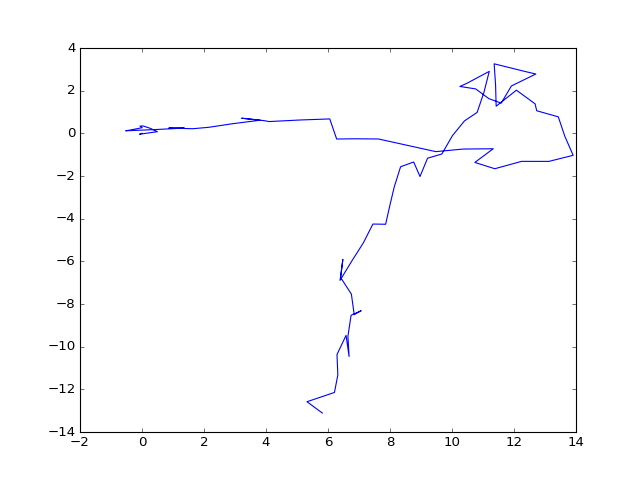

In [5]:
imfiles = sorted(glob.glob('../tests/ims/*.jpg'))
ims = [cv2.cvtColor(cv2.imread(im), cv2.COLOR_BGR2GRAY) for im in imfiles]

Rpos = np.matrix(np.eye(3))
Tpos = np.matrix([0, 0, 0]).T

ptsX = [0.]
ptsY = [0.]

now = time.clock()
prevPts = detectFeatures(ims[0])
plt.imshow(ims[0])

for i in xrange(len(ims) - 1):
    if len(prevPts) < 10:
        prevPts = detectFeatures(ims[i])
    newPts, prevPts = trackFeatures(ims[i], ims[i + 1], prevPts)
    
    #print "new: ", i, "\n", prevPts, "\n", newPts, "\n"
    E, mask = cv2.findEssentialMat(prevPts, newPts, 657.30254, (360, 240.), cv2.RANSAC, .999, 1.0)
    pose, R, t, mask = cv2.recoverPose(E, prevPts, newPts, focal=657.30254, pp=(360, 240))
    
    R = np.matrix(R)
    t = np.matrix(t)

    Rpos = R*Rpos
    Tpos = Tpos + (t.T*Rpos).T
    
    #print type(R), type(T)
    ptsX.append(float(Tpos[0]))
    ptsY.append(float(Tpos[1]))

done = time.clock()

print (done - now)/len(ims)

plt.figure(2)
plt.plot(ptsX, ptsY)
plt.show()

